In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox
import sklearn
import matplotlib.pyplot as plt

#uncomment in case of larger areas, Wawer is small enough

# ox.settings.log_console=True
# ox.settings.use_cache=True

# Get a car map and wisualize it 

In [2]:
G = ox.graph_from_place('Wawer, Warsaw, Masovian Voivodeship, Poland', network_type='drive', simplify=False)

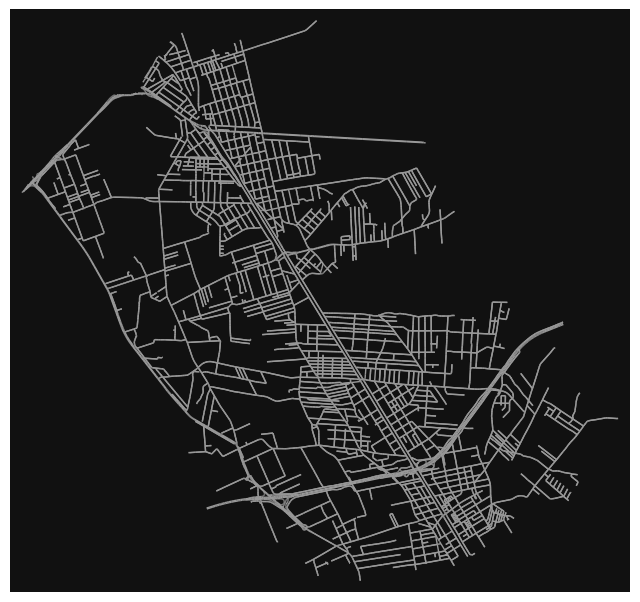

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot.plot_graph(G, node_size=0)

### Let us assume that salesman's time is much more valuable than petrol, in that case one should optimize travelling time

In [4]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G) 

In [5]:
start = (52.17223,21.17086)                                  #Latitude and Longtitude are much easier to use
end = (52.16557,21.16074)    
start_node = ox.distance.nearest_nodes(G, start[1], start[0])
end_node = ox.distance.nearest_nodes(G, end[1], end[0])      #But they need to be converted to graph nodes

### Draw a sample route

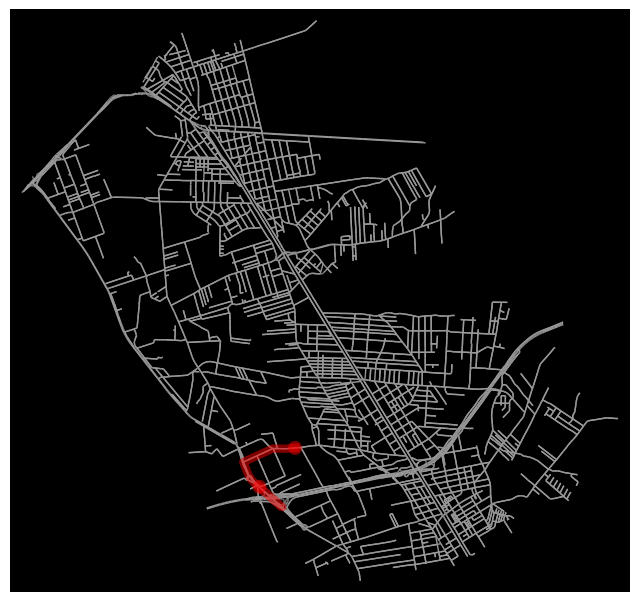

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

### Pick a bunch of points, where our salesman has to get

In [7]:
points = [
    (52.22221,21.10954),
    (52.17223,21.17086),
    (52.16557,21.16074),
    (52.22564,21.13164),
    (52.19482,21.19398), 
    (52.23992,21.15601),
    (52.21114,21.21112),
    (52.21997,21.20441),
    (52.15238,21.20398),
    (52.1577 ,21.2210 ),
    (52.1803 ,21.2356 ),
    (52.18981,21.12940),
    (52.21486,21.13084),
    (52.18101,21.19523),
    (52.2117 ,21.1666 ),
]

In [8]:
nodes = []
for point in points:
    node = ox.distance.nearest_nodes(G, point[1], point[0])
    nodes.append(node)

# Plot points on a map

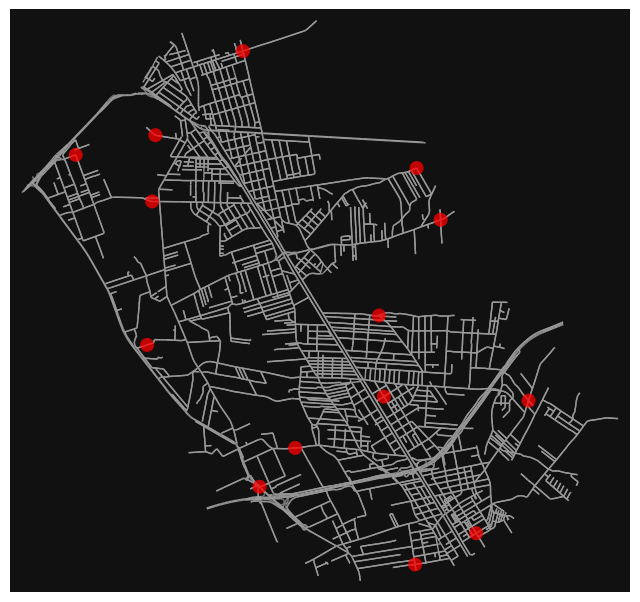

In [9]:
#tricky way to plot all points, maybe there is a better way
full_route = []
for i in range(len(points) - 1):

    start_node = nodes[i]
    end_node = nodes[i]

    route = nx.shortest_path(G, int(start_node), int(end_node), weight='travel_time')
    full_route.append(route)
        
ig, ax = ox.plot_graph_routes(G, full_route, route_colors= 'r' ,route_linewidths = 0, node_size = 0)

##### We have to remember that the distance matrix is asymetric!!!

In [10]:
#initialize with zeros
W = pd.DataFrame(np.zeros(shape = (len(points), len(points))), columns = nodes, index = nodes)
W

,248988936,1229926489,3751686895,4494259533,309168430,253232950,302439065,1145577162,1229926228,348965476,1205501530,10292008863,4692765260,309180217,302407775
248988936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1229926489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3751686895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4494259533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309168430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253232950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302439065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1145577162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1229926228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348965476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Get distances

In [11]:
for col in W.columns:
    for row in W.index:
        W.loc[row, col] = nx.shortest_path_length(G, row, col, weight='travel_time')

In [12]:
W

,248988936,1229926489,3751686895,4494259533,309168430,253232950,302439065,1145577162,1229926228,348965476,1205501530,10292008863,4692765260,309180217,302407775
248988936,0.0,517.8,539.5,325.0,627.1,508.5,700.6,700.2,733.7,785.2,839.8,382.7,173.1,619.9,505.7
1229926489,538.6,0.0,176.7,601.0,365.8,680.0,629.4,629.0,301.9,331.0,476.7,302.0,468.7,256.8,443.8
3751686895,494.8,109.4,0.0,557.2,475.2,740.7,735.3,734.9,296.3,347.8,492.0,258.2,424.9,347.0,549.7
4494259533,322.8,600.2,621.9,0.0,501.7,289.1,602.5,507.9,786.2,731.6,741.9,407.3,151.9,522.0,286.3
309168430,621.2,365.7,442.9,539.3,0.0,495.8,459.0,466.4,462.8,408.2,327.1,496.4,450.3,191.9,259.6
253232950,517.1,681.5,795.9,299.9,495.5,0.0,553.0,444.2,815.8,761.2,771.5,601.6,346.2,551.6,236.2
302439065,691.9,632.7,771.0,610.0,470.6,549.3,0.0,194.0,790.9,736.3,746.6,583.5,521.0,526.7,313.1
1145577162,689.7,630.5,768.8,518.7,468.4,444.2,199.2,0.0,788.7,734.1,744.4,581.3,518.8,524.5,278.6
1229926228,760.8,304.8,266.0,789.9,464.7,818.0,781.2,788.6,0.0,180.3,336.8,524.2,690.9,295.6,581.8
348965476,804.4,333.3,309.6,734.1,408.9,762.2,725.4,732.8,183.2,0.0,237.4,567.8,658.9,239.8,526.0


In [13]:
#Save for later use
W.to_csv("W_matrix")